In [1]:
import pandas as pd
import numpy as np
from plotnine import *

### GSE 544 - F2024
## Introduction
This document is a copy of the Midterm exam from 2023. In that exam, students were asked to write code to answer the questions below. This year, the questions will be the exact same style, but you will be asked to simply write down the steps of your approach and the approximate code you would use.

We will use the same dataset as in this document, so feel free to load and explore the data prior to the exam!


## The Data
The dataset for this exam concerns hiking trails in America’s National Parks system. Data is taken from the AllTrails app, which allows users to input new trails and rate existing ones. You can find documentation on the dataset from its creator here.

Variables in the data are:

    trail_id: An ID number for the trail
    name: Name of the trail
    area_name: National Park where the trial is located
    city_name: City where the trail is located
    state_name: State where the trail is located
    country_name: Country where the trail is located
    _geoloc: Latitude and longitude of trail
    popularity: A score from 0 to 100 of how often the trail is used.
    length: Distance covered by trail (in meters).
    elevation_gain: How much uphill is on the trail (in meters).
    difficulty_rating: Average user rating of trail difficulty
    route_type: Type of trail (loop, out and back, or point to point)
    visitor_usage: (Honestly, I’m not sure what this one is.)
    avg_rating: The average visitor rating of the trail (1 to 5 stars)
    num_reviews: The total number of reviews on the app for that trail
    features: Notable elements about the trail
    activities: Common uses for the trail
    units: This variable is a lie! All the lengths are in meters.

## Part One: Short Answer [70 points]
Estimated time: 30 minutes

Answer each of the following using code, and input your answers to the “Part One Quiz” on Canvas.

In [2]:
np_trails = pd.read_csv("Data/national_park_trails.csv")


### Question 1.1 [10 points]
What is the length in miles of the fourth longest trail in California?

EXAMPLE FULL CREDIT ANSWER FOR 2024 VERSION OF EXAM

First, I would limit the data to California, using boolean masking, which would look something like

ca = np_trails[np_trails['state'] == "CA"]
Then, I would convert the length variable in the dataset to be in miles instead of kilometers.

ca['length'] = ca['length']*(conversion math)
Last, I would use sortvalues to order my data by the length variable from high to low, and then I would look at the 4th one.

ca.sortvalues('length')[3]
Note that in the above example answer, there are small imperfections in the code! If you try running them, they won’t quite work. This is fine and will not lose points, as long as the general idea and major functions are correct.

In [3]:
np_trails.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [4]:
ca = np_trails[np_trails['state_name'] == 'California']
ca['length'] = ca['length'] / 1609
ca.sort_values('length', ascending=False).iloc[3]

C:\Users\isabe\AppData\Local\Temp\ipykernel_29636\2157025099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


trail_id                                                      10418330
name                                                     Big SEKI Loop
area_name                                   Kings Canyon National Park
city_name                                                         Hume
state_name                                                  California
country_name                                             United States
_geoloc                           {'lat': 36.79608, 'lng': -118.58322}
popularity                                                      2.1531
length                                                      145.230682
elevation_gain                                              10944.7584
difficulty_rating                                                    7
route_type                                                        loop
visitor_usage                                                      1.0
avg_rating                                                         5.0
num_re


### Question 1.2 [10 points]
Consider an “easy” trail to be one that has an elevation gain of less than 500 meters, a distance of less than 5 kilometers, and a difficulty rating below 4.

Which California National Park has the highest average rating of its “easy” trails?

In [5]:
easy_trails = ca[(ca['elevation_gain'] < 500) & (ca['length'] * 1.609 < 5) & (ca['difficulty_rating'] < 4)]
easy_trails.groupby("area_name")["avg_rating"].mean().sort_values(ascending=False).head(n=1)

area_name
Kings Canyon National Park    4.444444
Name: avg_rating, dtype: float64


### Question 1.3 [15 points]
How many National Parks contain the word “Land” somewhere in their name? (if the word appears as part of a longer word, like “Candyland”, this counts too)

In [6]:
num_parks_with_land = np_trails[np_trails['area_name'].str.contains(r'Land', case=False, na=False)]
len(num_parks_with_land)

109

In [7]:
import re
# Combine all park names into a single string
all_park_names = " ".join(np_trails['area_name'].dropna())
# Use re.findall to find all occurrences of the word "Land", case insensitive
land_occurrences = re.findall(r'\wLand', all_park_names, flags=re.IGNORECASE)
len(land_occurrences)

109


### Question 1.4 [15 points]
Consider the following plot, made from a dataset called np_trails_new. Although you can see the code that made the plot, you do not see the code that made the np_trails_new object.

Your job in this question is to create the np_trails_new object. You’ll know when you have succeeded, because the code provided will produce the plot.

In Canvas, turn in the values of the first row of the np_trails_new object.

(If your dataset has more columns than seem to be available, only include the ones that were absolutely necessary to keep in this analysis.)

In [8]:
# Extract relevant columns
np_trails_subset = np_trails[['name', 'avg_rating', 'difficulty_rating', 'popularity', 'visitor_usage']]
# Reshape the data into a long format suitable for plotting
np_trails_new = pd.melt(np_trails_subset, id_vars= 'name', var_name='measure', value_name='score')
np_trails_new.head()

,name,measure,score
0,Harding Ice Field Trail,avg_rating,5.0
1,Mount Healy Overlook Trail,avg_rating,4.5
2,Exit Glacier Trail,avg_rating,4.5
3,Horseshoe Lake Trail,avg_rating,4.5
4,Triple Lakes Trail,avg_rating,4.5


C:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_density : Removed 253 rows containing non-finite values.


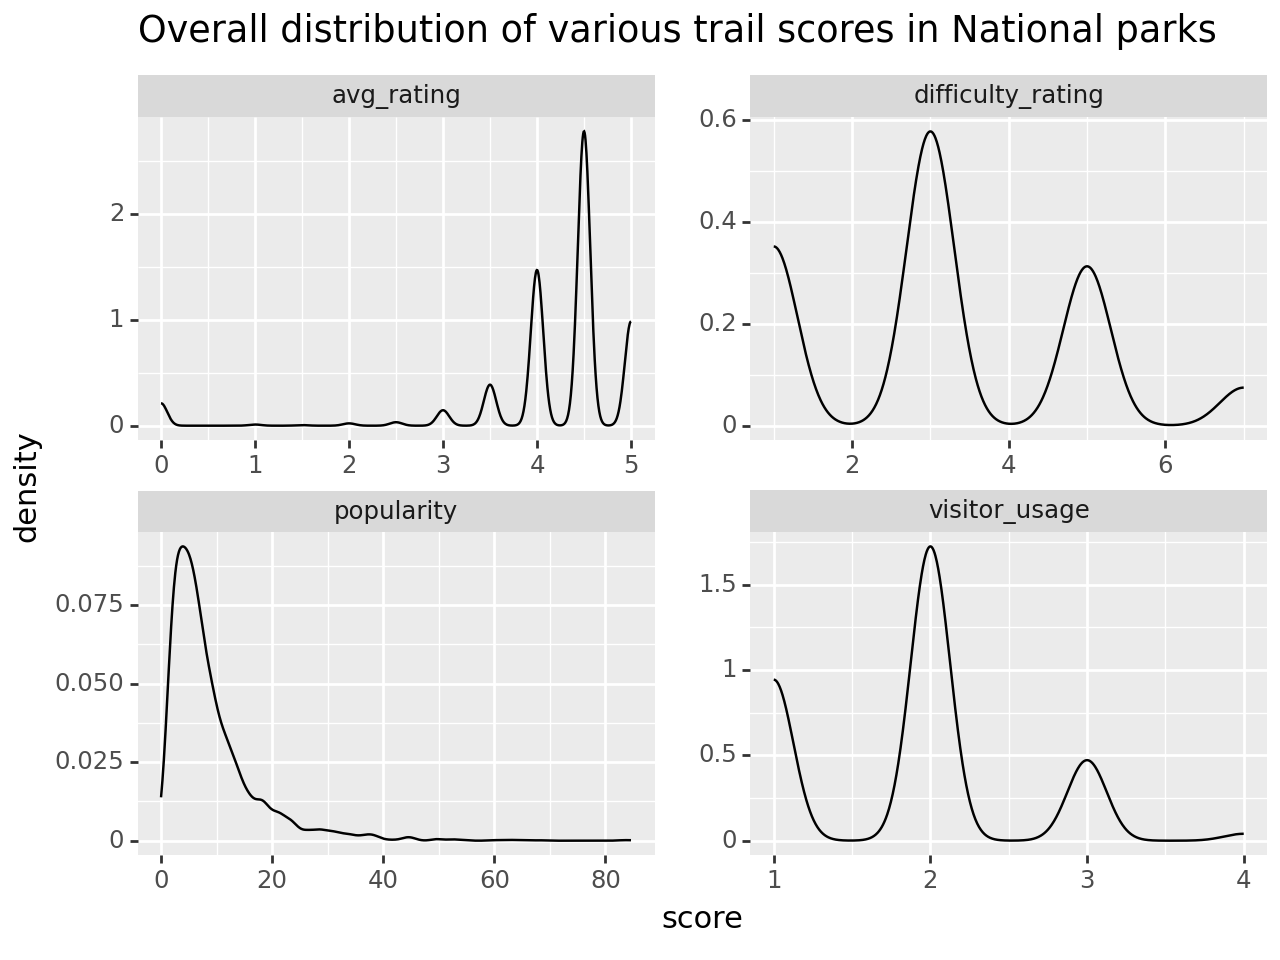

<Figure Size: (640 x 480)>

In [9]:
from plotnine import ggplot, aes, geom_density, facet_wrap, ggtitle

(ggplot(np_trails_new, aes(x="score"))
+ geom_density()
+ facet_wrap('~ measure', scales = 'free') 
+ ggtitle("Overall distribution of various trail scores in National parks")
)


### Question 1.5 [20 points]
Recreate the plot below, by filling in the blanks in the code on Canvas.
<img src="boxplot.png">


C:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
C:\Users\isabe\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 54 rows containing non-finite values.


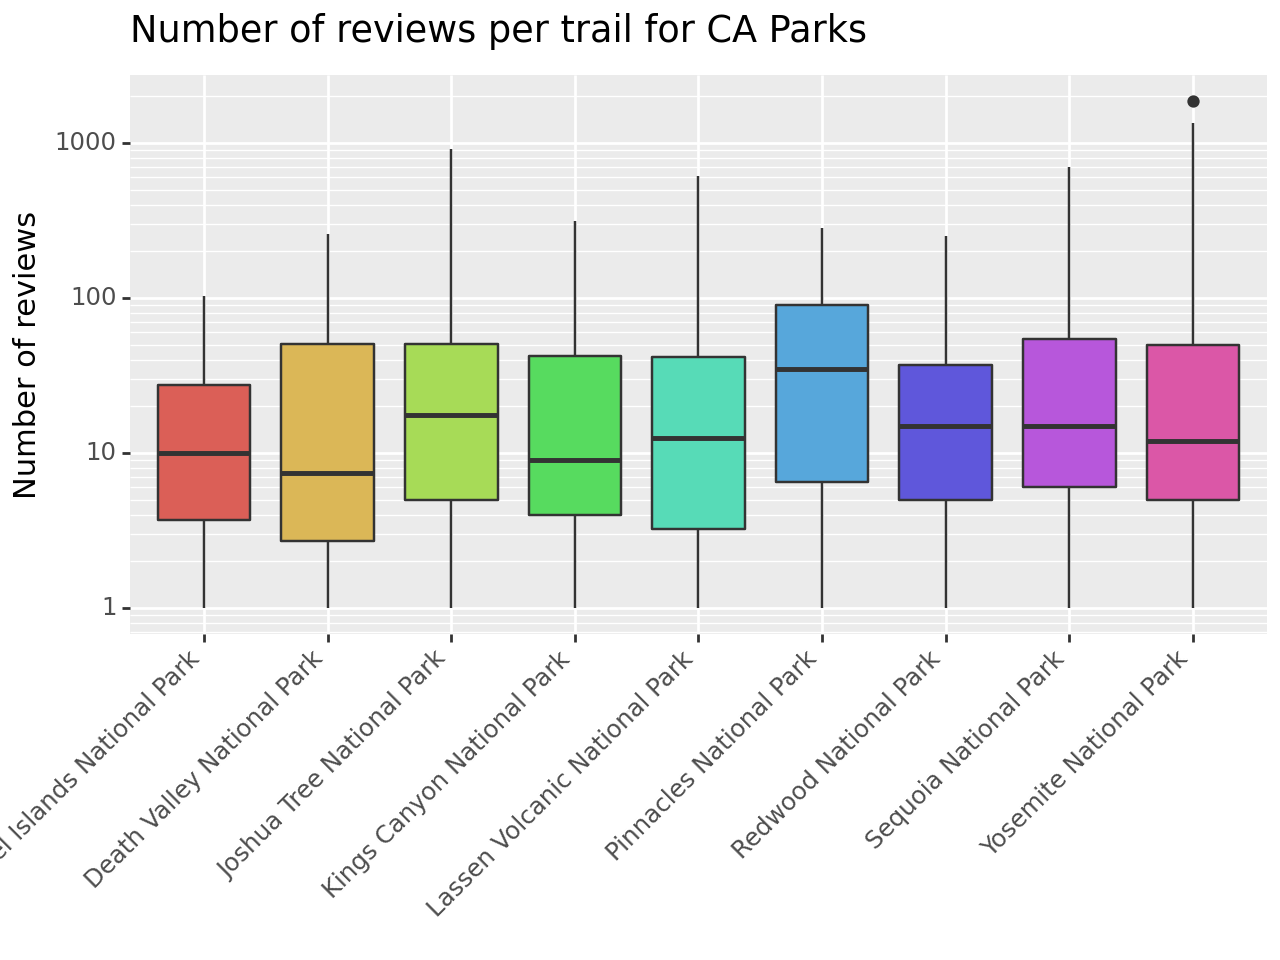

<Figure Size: (640 x 480)>

In [10]:
from plotnine import geom_boxplot
from plotnine.scales import scale_y_log10

(ggplot(ca, aes(x="area_name", y="num_reviews", fill="area_name"))
+ geom_boxplot()
+ scale_y_log10() 
+ scale_fill_discrete(guide=False)
+ labs(
  x = "",
  y = "Number of reviews",
  title = "Number of reviews per trail for CA Parks"
)
+ theme(
  axis_text_x = element_text(rotation=45, hjust=1)
)
)

## Part Two: Programming [80 points]
Estimated time: 1 hour

### Question 2.1 [30 points]
Write a functions to help recommend trails to a user. The function will have as its input the dataset and the name of a National Park, and the following optional arguments:

        A minimum trail elevation gain (in meters)
        A maximum trail elevation gain (in meters)
        A minimum trail rating
        The type of trail
        (Note: “optional” here means that the function can run even if the user doesn’t supply these arguments, not that they are optional for you to include in your function definition.)

The function should return all the trails that fit the supplied criteria. You may assume that the variable names of any inputted dataset match the np_trails dataset.

Here is some starter code for this function:

    def recommend_trails(dataset, ____________):
      
      if min_elev is None:
        min_elev = ______
        
        
      # More of your code here
      
      
      return ______

Include the following code to show your function works:

recommend_trails(np_trails, "Haleakala National Park", min_elev = 1000, min_rating = 4)

In [11]:
def recommend_trails(dataset, park_name=None, min_elev=None, max_elev=None, min_rating=None, trail_type=None):
    # Set default values if not provided by the user
    if min_elev is None:
        min_elev = 0  # Minimum elevation gain is 0 if not provided
    if max_elev is None:
        max_elev = float('inf')  # Maximum elevation gain is infinite if not provided
    if min_rating is None:
        min_rating = 0  # Minimum rating is 0 if not provided
    if park_name is None:
        park_name = dataset['area_name'].unique()  # Default to all trail types if not provided
    if trail_type is None:
        trail_type = dataset['route_type'].unique()  # Default to all trail types if not provided
    
    # Filter the dataset based on the provided criteria
    filtered_trails = dataset[
        (dataset['area_name'].isin([park_name]) if isinstance(park_name, str) else True) &  # Match the National Park
        (dataset['elevation_gain'] >= min_elev) &  # Minimum elevation gain
        (dataset['elevation_gain'] <= max_elev) &  # Maximum elevation gain
        (dataset['avg_rating'] >= min_rating) &  # Minimum trail rating
        (dataset['route_type'].isin([trail_type]) if isinstance(trail_type, str) else True)  # Match trail type if provided
    ]
    
    return filtered_trails

recommend_trails(np_trails, "Haleakala National Park", min_elev = 1000, min_rating = 4)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75275, 'lng': -156.22884}",9.3861,20116.750,1105.8144,5,loop,2.0,4.5,43,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",m
3309,10236001,Keonehe'ehe'e Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.714480000000002, 'lng': -156.25072}",9.1555,28324.384,1171.9560,5,out and back,2.0,5.0,22,"['dogs-no', 'views', 'wildlife']","['backpacking', 'camping', 'hiking']",m
3311,10014989,Kaupo Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.64981, 'lng': -156.137}",8.3240,19312.080,1670.9136,5,out and back,1.0,4.0,8,"['dogs-no', 'views', 'wildlife']",['hiking'],m



### Question 2.2 [30 points]
It’s reasonable to think we might also want to search for hikes according to climate. Therefore, we will scrape the average temperatures for each U.S. state from the following website:

https://www.extremeweatherwatch.com/us-state-averages
Write a function that takes one optional arguent, month.

The function should scrape the temperature website above for the desired month. If no month is specified then it should scrape the overall average temperatures. The function should return a data frame of the temperatures for the specified month in the names of the temperature columns.

Here is some starter code for this function:

      def scrape_temps(month = None):
        
        my_url = "__________"
        response = ___________(my_url)
        soup = BeautifulSoup(_______, "html.parser")
        
          
          
        ## More of your code here
        
        
        return ______

Hint: I recommend first writing non-function code to scrape the dataset, then figuring out how to incorporate your code into the function.

Include the following code to show your function works:

scrape_month_temp(month = "january")

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_temps(month=None):
    # If a month is provided, append it to the URL
    if month:
        my_url = f"https://www.extremeweatherwatch.com/us-state-averages/month-{month}"
    else:
        # Scrape overall average temperatures if no month is specified
        my_url = "https://www.extremeweatherwatch.com/us-state-averages"
    
    # Send a request to the website
    response = requests.get(my_url)
    
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract the table containing the temperatures
    table = soup.find("table")
    
    # Extract the column headers (State, Temperature, etc.)
    headers = [th.text.strip() for th in table.find_all("th")]
    
    # Extract all rows in the table
    rows = []
    for tr in table.find_all("tr")[1:]:  # Skip header row
        cells = [td.text.strip() for td in tr.find_all("td")]
        if cells:
            rows.append(cells)
    
    # Convert the data into a DataFrame
    df = pd.DataFrame(rows, columns=headers)
    
    return df

# Example to test the function
scrape_temps(month="january")

ConnectionError: HTTPSConnectionPool(host='www.extremeweatherwatch.com', port=443): Max retries exceeded with url: /us-state-averages/month-january (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000184DAA69F70>: Failed to resolve 'www.extremeweatherwatch.com' ([Errno 11002] getaddrinfo failed)"))


### Question 2.3 [20 points]
I am looking for a trail that is:

1000-3000 meters of elevation (I like mountains, but not too big.)

Rated at least a 4.5 on average

A loop trail (I don’t like to retrace my steps)

Not too cold in the summer, even at the peak

Use your recommend_trails function to find me a few good options.

Use your second function (scrape_temps) to gather information on temperatures for the summer months (i.e. May, June, July, August) in the states for these trails.

Merge these two datasets, so I can see all the recommended trails alongside their summer temps. If you were unable to scrape the information from the website, then feel free to import the temp_data.csv file and use average temperatures instead of summer temperatures to complete this question.

Convert the temperatures of the states to be the temperatures at the peak elevation of my recommended hikes. The temperature decreases by about 5.4 degrees Fahrenheit (or 9.8 degrees Celsius) for every 1000 feet you go up in elevation

Note: In this question, many points will be deducted for copy-pasting similar code many times, and a small penalty will be deducted for use of a for loop.

In [204]:
# Example usage of recommend_trails
recommended_trails = recommend_trails(np_trails, min_elev = 1000, max_elev = 3000, min_rating = 4.5, trail_type = "loop")
recommended_trails

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
47,10004120,Grandview Trail Loop,Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 35.99805, 'lng': -111.98775}",14.8144,18668.344,1188.7200,7,loop,2.0,5.0,62,"['dogs-no', 'river', 'views', 'wild-flowers', ...","['backpacking', 'birding', 'camping', 'hiking'...",i
77,10042232,Thunder Creek to Deer Creek and Thunder Falls,Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 36.4347, 'lng': -112.42932}",10.2641,46670.860,2213.7624,5,loop,1.0,5.0,10,"['dogs-no', 'river', 'views', 'waterfall', 'wi...","['backpacking', 'birding', 'camping', 'hiking'...",i
130,10259354,Boucher Trail to Hermit Trail Loop,Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 36.06059, 'lng': -112.21213}",5.7123,32508.668,1758.6960,5,loop,1.0,5.0,6,"['dogs-no', 'river', 'views', 'wild-flowers', ...","['backpacking', 'birding', 'camping', 'hiking'...",i
132,10389448,"Rim Trail, South Kaibab and Bright Angel Loop",Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 36.06, 'lng': -112.10668}",5.5548,34118.008,1501.7496,5,loop,2.0,4.5,13,"['river', 'views', 'wild-flowers', 'wildlife']","['birding', 'hiking', 'nature-trips']",i
241,10033156,Rae Lakes Trail,Kings Canyon National Park,Cedar Grove,California,United States,"{'lat': 36.79468, 'lng': -118.58289}",27.0010,66626.676,2390.8512,5,loop,2.0,5.0,189,"['dogs-no', 'forest', 'lake', 'river', 'views'...","['backpacking', 'camping', 'hiking', 'nature-t...",i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,10029730,Marion Lake Trail,Grand Teton National Park,Moose,Wyoming,United States,"{'lat': 43.59701, 'lng': -110.87123}",8.3720,21565.156,1161.8976,5,loop,NaN,4.5,18,"['dogs-no', 'lake', 'river', 'views', 'wild-fl...","['backpacking', 'camping', 'hiking', 'nature-t...",i
3075,10235847,Mount Hunt Divide via Death Canyon Trail,Grand Teton National Park,Moose,Wyoming,United States,"{'lat': 43.65578, 'lng': -110.7811}",7.5664,36210.150,1734.9216,5,loop,NaN,5.0,16,"['dogs-no', 'lake', 'river', 'wildlife']","['backpacking', 'birding', 'camping', 'hiking'...",i
3082,10007017,Sepulcher Mountain Trail,Yellowstone National Park,Yellowstone National Park,Wyoming,United States,"{'lat': 44.97375, 'lng': -110.70439}",7.2290,18024.608,1071.9816,5,loop,1.0,4.5,33,"['dogs-no', 'forest', 'hot-springs', 'views', ...","['backpacking', 'hiking', 'trail-running']",i
3212,10026571,Heart Lake and the Two Ocean Plateau Loop Trail,Yellowstone National Park,Yellowstone National Park,Wyoming,United States,"{'lat': 44.31735, 'lng': -110.59824}",2.1610,96238.532,1700.7840,5,loop,1.0,5.0,1,"['dogs-no', 'forest', 'lake', 'views', 'wild-f...","['backpacking', 'birding', 'camping', 'hiking'...",i


In [205]:
states = recommended_trails["state_name"].value_counts().index.to_list()

In [206]:
# Function to scrape multiple months for a given list of states and rename columns with month names
def scrape_multiple_months_for_states(states, months=['may', 'june', 'july', 'august']):
    # Use map to scrape temps and rename the temperature columns based on the month
    temp_dfs = list(map(lambda month: scrape_temps(month).drop("Precipitation (in)", axis=1).rename(
        columns={'City': 'State'}), months))
    
    # Concatenate the DataFrames on the 'State' column (axis=1 for horizontal concatenation)
    summer_temps = pd.concat(temp_dfs)
    summer_temps["avg_summer_temp"] = (summer_temps["High (°F)"].astype(float) + summer_temps["Low (°F)"].astype(float)) / 2
    
    # Filter to include only the relevant states
    summer_temps_filtered = summer_temps[summer_temps['State'].isin(states)]
    
    return summer_temps_filtered.groupby("State")["avg_summer_temp"].mean()

# Scrape temperatures for the selected states
temp_data = scrape_multiple_months_for_states(states)
temp_data

State
Arizona           75.9125
California        70.9875
Colorado          62.7250
Maine             60.8875
Montana           60.3125
Nevada            66.9125
North Carolina    73.9000
Oregon            60.6125
Tennessee         73.7000
Texas             79.9000
Utah              66.5500
Virginia          71.3625
Washington        60.4625
Wyoming           59.7000
Name: avg_summer_temp, dtype: float64

In [207]:

# Next, we'll write code to calculate adjusted temperatures based on the trail's elevation gain.
def adjust_temperatures(temp_df, trails_df):
    # Merge temperature data with trail data
    merged_df = pd.merge(trails_df, temp_df, how='left', left_on='state_name', right_on='State')

    # Adjust temperatures based on elevation: 
    # Temp decreases by 5.4°F for every 1000 feet of elevation gain
    # Convert elevation from meters to feet (1 meter = 3.28084 feet)
    merged_df['adjusted_temperature'] = merged_df['avg_summer_temp'] - (((merged_df['elevation_gain'] * 3.28084) / 1000) * 5.4)
    
    return merged_df

final_trails_with_temps = adjust_temperatures(temp_data, recommended_trails)

In [208]:
final_trails_with_temps.sort_values("adjusted_temperature", ascending=False)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units,avg_summer_temp,adjusted_temperature
84,10271336,"Tejas Trail, Juniper Trail to the Bowl and Hun...",Guadalupe Mountains National Park,Salt Flat,Texas,United States,"{'lat': 31.89629, 'lng': -104.82772}",3.4552,20116.750,1003.7064,5,loop,2.0,5.0,4,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",i,79.9000,62.117799
83,10442528,Emory Peak - Northeast Rim - South Rim Loop,Big Bend National Park,Big Bend National Park,Texas,United States,"{'lat': 29.27465, 'lng': -103.30115}",4.1763,27519.714,1121.9688,7,loop,3.0,5.0,5,"['dogs-no', 'forest', 'views', 'wildlife']","['backpacking', 'camping', 'hiking', 'nature-t...",i,79.9000,60.022599
76,10299002,Mount Cammerer Loop - Low Gap and Lower Cammerer,Great Smoky Mountains National Park,Cosby,Tennessee,United States,"{'lat': 35.75595, 'lng': -83.208}",6.0457,26071.308,1050.9504,5,loop,1.0,4.5,18,"['forest', 'views', 'wild-flowers', 'wildlife']","['birding', 'camping', 'hiking', 'nature-trips...",i,73.7000,55.080799
0,10004120,Grandview Trail Loop,Grand Canyon National Park,Grand Canyon,Arizona,United States,"{'lat': 35.99805, 'lng': -111.98775}",14.8144,18668.344,1188.7200,7,loop,2.0,5.0,62,"['dogs-no', 'river', 'views', 'wild-flowers', ...","['backpacking', 'birding', 'camping', 'hiking'...",i,75.9125,54.852499
57,10037743,Bradley Fork and Chasteen Creek Loop Trail,Great Smoky Mountains National Park,Cherokee,North Carolina,United States,"{'lat': 35.56294, 'lng': -83.31057}",7.1128,26715.044,1083.8688,3,loop,1.0,4.5,18,"['beach', 'dogs-no', 'forest', 'kids', 'river'...","['backpacking', 'birding', 'camping', 'hiking'...",i,73.9000,54.697599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,10042034,Rose Garden Hill OHV Trail,Arches National Park,Moab,Utah,United States,"{'lat': 38.57333, 'lng': -109.55064}",3.7369,131322.144,2778.8616,5,loop,1.0,4.5,4,"['dogs-no', 'river', 'views']",['off-road-driving'],i,66.5500,17.318198
42,10515687,Rowe's Glacier to Lost Lake via Lawn Lake Trail,Rocky Mountain National Park,Estes Park,Colorado,United States,"{'lat': 40.40709, 'lng': -105.62642}",2.5233,58579.976,2935.8336,7,loop,1.0,4.5,5,"['dogs-no', 'forest', 'lake', 'river', 'views'...","['backpacking', 'hiking', 'rock-climbing']",i,62.7250,10.712198
102,10012300,Mount Rainier Northern Loop Trail,Mount Rainier National Park,Ashford,Washington,United States,"{'lat': 46.91577, 'lng': -121.64369}",10.5171,50211.408,2838.9072,7,loop,2.0,4.5,30,"['dogs-no', 'forest', 'lake', 'river', 'views'...","['backpacking', 'hiking']",i,60.4625,10.166898
111,10032308,O'Neil Pass via North Fork of Skokomish Trail,Olympic National Park,Hoodsport,Washington,United States,"{'lat': 47.51591, 'lng': -123.32789}",3.0368,58579.976,2989.7832,7,loop,2.0,5.0,2,"['dogs-no', 'forest', 'river', 'views', 'wild-...","['backpacking', 'birding', 'camping', 'hiking'...",i,60.4625,7.493898



### “Interview” Questions
The 2024 Exam will also include some questions about python programming and data wrangling in general, that do not relate to the given dataset. These are meant to mimic the style of questions you might see in an interview for an analytics position.

Example question
The pandas library introduces a new data structure, the data frame. How is this different than basic python object structures, and what are the advantages of the data frame structure over these?

Example answer
A data frame is two-dimensional, like a matrix or array. However, unlike those, it allows the columns to be different data types from each other.

Some advantages are:

We can store datasets, which often contain many different variable types, all in one object.

We can give the columns and rows names to reference them by.

We can use many built-in methods in pandas that are designed to do data manipulation on data frames.